# Step 1: Data Exploration and Preprocessing

In [5]:
pip install openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_excel('training_dataset.xlsx')
data.head()

,URBRRL,RATCAT_A,INCGRP_A,INCTCFLG_A,FAMINCTC_A,IMPINCFLG_A,RJWKCLSOFT_A,RJWCLSNOSD_A,RJWRKCLSSD_A,RECJOBSD_A,...,PHSTAT_A,PROXYREL_A,PROXY_A,AVAIL_A,HHSTAT_A,INTV_MON,RECTYPE,WTFA_A,HHX,POVRATTC_A
0,2,11,3,0,70000,0,NaN,NaN,NaN,NaN,...,3,NaN,NaN,1,1,3,10,13772.434,H050728,3.50
1,4,6,1,0,30000,0,NaN,NaN,NaN,NaN,...,1,NaN,NaN,1,1,7,10,9326.686,H053010,1.70
2,3,11,3,0,63464,0,NaN,NaN,NaN,NaN,...,1,NaN,NaN,1,1,2,10,4509.724,H067137,3.60
3,3,5,1,0,25000,2,NaN,NaN,NaN,NaN,...,3,NaN,NaN,1,1,11,10,10849.226,H040530,1.46
4,4,13,4,0,75000,0,NaN,NaN,NaN,NaN,...,4,NaN,NaN,1,1,7,10,5771.964,H052303,4.85


In [8]:
# Check for missing values as percentages
print("\nMissing Values (Percentage):")
missing_percentage = (data.isnull().sum() / len(data)) * 100
missing_percentage = missing_percentage[missing_percentage > 0]  # Only show columns with missing values
print(missing_percentage.sort_values(ascending=False))



Missing Values (Percentage):
OGFLG_A         100.000000
PRPLCOV2_C_A    100.000000
CHFLG_A         100.000000
CHHDHP_A         99.990167
LARYNAGETC_A     99.985251
                   ...    
INCSSRR_A         3.539823
WLKLEIS_A         0.958702
WLKTRAN_A         0.958702
WELLNESS_A        0.624385
MAXEDUC_A         0.157325
Length: 421, dtype: float64


In [9]:
# Check for duplicate rows
print("\nDuplicate Rows:", data.duplicated().sum())


Duplicate Rows: 0


Dropped columns: ['RJWKCLSOFT_A', 'RJWCLSNOSD_A', 'RJWRKCLSSD_A', 'RECJOBSD_A', 'SDMSRSOFT_A', 'SDMSRS_A', 'WRKCLSOFT_A', 'FAMCARECVD_A', 'CANCOVCARE_A', 'CANCOVOTH_A', 'CANCOVCHG_A', 'CANCOVTREA_A', 'CVDSEV_A', 'SCHDYMSSTC_A', 'REPWRKDYTC_A', 'PRTNREDUC_A', 'PRTNRAGETC_A', 'PRTNRWKFT_A', 'PRTNRWRK_A', 'PRTNRSEX_A', 'INJWRKDYTC_A', 'NUMINJTC_A', 'SHINGRXYRP_A', 'ASDYS12MTC_A', 'MILSPC1R_A', 'OGFLG_A', 'OPFLG_A', 'CHFLG_A', 'MAFLG_A', 'PLNWRKR2_A', 'RSNHIMISS_A', 'RSNHIJOB_A', 'PRFLG_A', 'PLEXCHPR1_A', 'PRPREM1_A', 'PXCHNG1_A', 'HICOSTR2_A', 'PRPLCOV1_C_A', 'PRPLCOV2_C_A', 'PLEXCHOG_A', 'PLEXCHOP_A', 'EXCHPR2_A', 'COLRCAGETC_A', 'HDNCKAGETC_A', 'OTHERAGETC_A', 'UTERUAGETC_A', 'THYROAGETC_A', 'THROAAGETC_A', 'STOMAAGETC_A', 'SKNDKAGETC_A', 'SKNNMAGETC_A', 'SKNMAGETC_A', 'RECTUAGETC_A', 'PROSTAGETC_A', 'PANCRAGETC_A', 'OVARYAGETC_A', 'MOUTHAGETC_A', 'MELANAGETC_A', 'LYMPHAGETC_A', 'LUNGAGETC_A', 'LIVERAGETC_A', 'LEUKEAGETC_A', 'LARYNAGETC_A', 'GALLBAGETC_A', 'ESOPHAGETC_A', 'COLONAGETC_A'

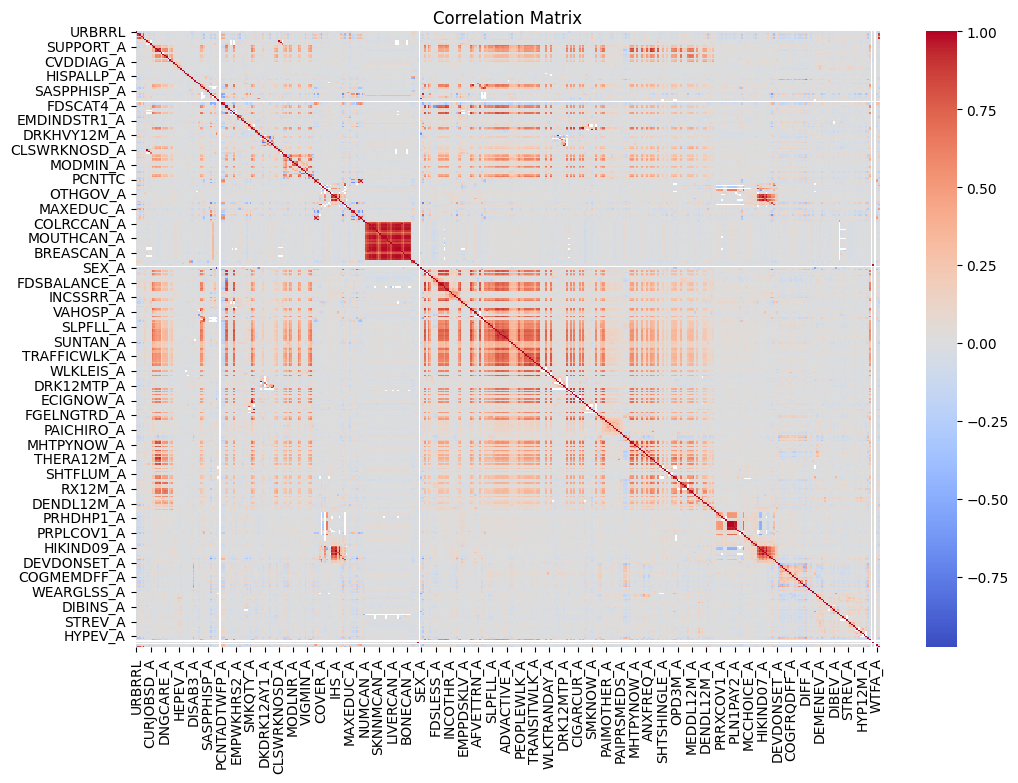


Top 10 Features Positively Correlated with Target:
WEIGHTLBTC_A    1.000000
BMICAT_A        0.735179
SPOUSESEX_A     0.466615
HEIGHTTC_A      0.436463
PHSTAT_A        0.174023
SUNSCREEN_A     0.114909
BREASCAN_A      0.098999
EMPWKHRS2_A     0.096917
PAIYOGA_A       0.093142
PAIFRQ3M_A      0.085509
Name: WEIGHTLBTC_A, dtype: float64

Top 10 Features Negatively Correlated with Target:
CIGAREV_A      -0.116269
PREDIB_A       -0.118300
ADVEAT_A       -0.133824
EMDINDSTR1_A   -0.134943
HYPEV_A        -0.152300
SEX_A          -0.410027
HHRESPSA_FLG         NaN
SRVY_YR              NaN
HHSTAT_A             NaN
RECTYPE              NaN
Name: WEIGHTLBTC_A, dtype: float64


In [10]:
# Step 1: Create a copy of the original dataset
df1 = data.copy()

# Step 2: Drop columns with >90% missing values
missing_percentage = (df1.isnull().sum() / len(df1)) * 100
columns_to_drop = missing_percentage[missing_percentage > 90].index
df1.drop(columns=columns_to_drop, inplace=True)
print(f"Dropped columns: {list(columns_to_drop)}")

# Step 3: Select only numeric columns for correlation analysis
numeric_df1 = df1.select_dtypes(include=['float64', 'int64'])

# Step 4: Compute correlation matrix for numeric columns
correlation_matrix = numeric_df1.corr()

# Step 5: Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# Step 6: Display correlations with the target variable (WEIGHTLBTC_A)
target = 'WEIGHTLBTC_A'
if target in numeric_df1.columns:
    correlations = correlation_matrix[target].sort_values(ascending=False)
    print("\nTop 10 Features Positively Correlated with Target:")
    print(correlations.head(10))
    print("\nTop 10 Features Negatively Correlated with Target:")
    print(correlations.tail(10))
else:
    print("\nTarget variable not found in the numeric dataset.")



Categorical Columns in the Dataset: ['HHX']

Analyzing relationship for: HHX
          mean  median  count
HHX                          
H041787  299.0   299.0      1
H045903  299.0   299.0      1
H069309  299.0   299.0      1
H001734  298.0   298.0      1
H005643  298.0   298.0      1
H053550  298.0   298.0      1
H036934  298.0   298.0      1
H050706  297.0   297.0      1
H051700  297.0   297.0      1
H042768  296.0   296.0      1
          mean  median  count
HHX                          
H034574  100.0   100.0      1
H040391  100.0   100.0      1
H061977  100.0   100.0      1
H009606  100.0   100.0      1
H048619  100.0   100.0      1
H009847  100.0   100.0      1
H048623  100.0   100.0      1
H014723  100.0   100.0      1
H009651  100.0   100.0      1
H014350  100.0   100.0      1


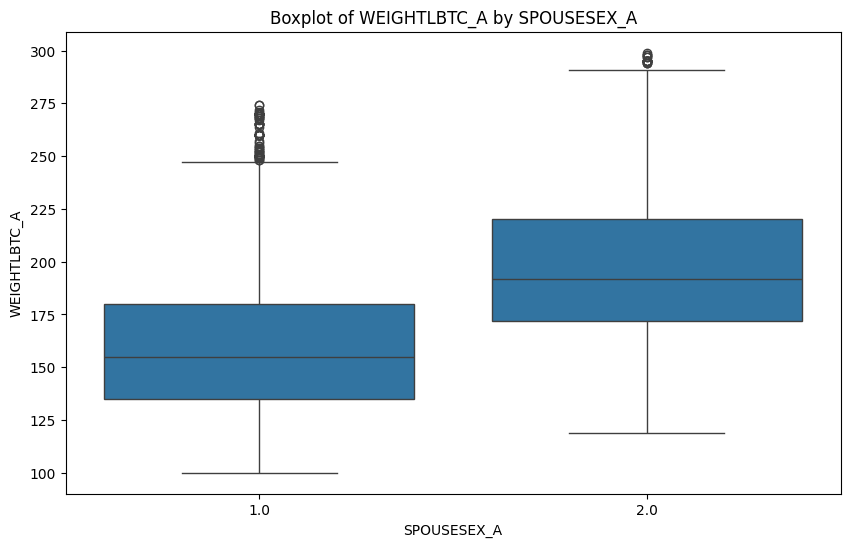

In [11]:
# Step 1: Identify categorical columns
categorical_cols = df1.select_dtypes(include=['object']).columns
print(f"\nCategorical Columns in the Dataset: {list(categorical_cols)}")

# Step 2: Group and analyze the relationship with the target variable
target = 'WEIGHTLBTC_A'

# Iterate through each categorical column
for col in categorical_cols:
    print(f"\nAnalyzing relationship for: {col}")
    if col in df1.columns:
        grouped_data = df1.groupby(col)[target].agg(['mean', 'median', 'count']).sort_values(by='mean', ascending=False)
        print(grouped_data.head(10))  # Display top 10 categories with the highest mean target value
        print(grouped_data.tail(10))  # Display bottom 10 categories with the lowest mean target value

# Step 3: Visualize the relationship for selected categorical variables
import seaborn as sns
import matplotlib.pyplot as plt

# Example visualization for one categorical variable
selected_categorical = 'SPOUSESEX_A'  # Replace with a relevant categorical column from the analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x=selected_categorical, y=target, data=df1)
plt.title(f"Boxplot of {target} by {selected_categorical}")
plt.show()


In [12]:
# Drop irrevelant columns

In [13]:
# Step 1: Drop identifier columns
identifier_cols = ['HHX']  # Add more identifier columns if applicable
df1.drop(columns=identifier_cols, inplace=True, errors='ignore')
print(f"Dropped identifier columns: {identifier_cols}")

# Step 2: Drop constant or near-constant columns
low_variability_cols = [col for col in df1.columns if df1[col].nunique() <= 1]
df1.drop(columns=low_variability_cols, inplace=True, errors='ignore')
print(f"Dropped low variability columns: {low_variability_cols}")

# Step 3: Drop features with low correlation to the target
# Select numerical columns
correlation_threshold = 0.05  # Define a threshold for low correlation
numerical_cols = df1.select_dtypes(include=['float64', 'int64']).columns
correlations = df1[numerical_cols].corr()['WEIGHTLBTC_A'].abs()  # Absolute correlations with the target

low_correlation_cols = correlations[correlations < correlation_threshold].index.tolist()

# Ensure we don't drop the target variable
if 'WEIGHTLBTC_A' in low_correlation_cols:
    low_correlation_cols.remove('WEIGHTLBTC_A')

df1.drop(columns=low_correlation_cols, inplace=True, errors='ignore')
print(f"Dropped low correlation columns: {low_correlation_cols}")

# Step 4: Drop redundant columns (highly correlated features)
# Compute correlation matrix
correlation_matrix = df1.corr().abs()

# Identify highly correlated features
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)
highly_correlated_cols = [
    column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)
]
df1.drop(columns=highly_correlated_cols, inplace=True, errors='ignore')
print(f"Dropped highly correlated columns: {highly_correlated_cols}")

# Step 5: Verify remaining features
print(f"\nRemaining Features ({len(df1.columns)}): {list(df1.columns)}")


Dropped identifier columns: ['HHX']
Dropped low variability columns: ['HHRESPSA_FLG', 'SRVY_YR', 'HHSTAT_A', 'RECTYPE']
Dropped low correlation columns: ['RATCAT_A', 'INCGRP_A', 'INCTCFLG_A', 'FAMINCTC_A', 'WRKCLSNOSD_A', 'WRKCLSSD_A', 'CURJOBSD_A', 'CMPSUPPORT_A', 'SUPPORT_A', 'FAMCAREDNG_A', 'FAMCARE12M_A', 'HOMECAREDG_A', 'VIRAPPCVD_A', 'VIRAPP12M_A', 'DNGCARE_A', 'DLYCARE_A', 'CVDRSLT_A', 'COVIDTEST_A', 'CVDDIAG_A', 'HLTHCOND_A', 'MEDRXTRT_A', 'LIVEREV_A', 'HEPEV_A', 'KIDWEAKEV_A', 'PPSU', 'PSTRAT', 'WLKLEISTC_A', 'WLKTRANTC_A', 'HISPALLP_A', 'RACEALLP_A', 'DISAB3_A', 'NUMBRNTC_A', 'AFNOW', 'CITZNSTP_A', 'MARSTAT_A', 'SASPPRACE_A', 'SASPPHISP_A', 'SPOUSEDUC_A', 'SPOUSWKFT_A', 'SPOUSWRK_A', 'PCNTADTWKP_A', 'FDSCAT4_A', 'FDSCAT3_A', 'EMPDYSMSS2_A', 'EMPLSTWORK_A', 'EMPWRKLSWK_A', 'EMDOCCUPR2_A', 'SMKQTNP_A', 'SMKECIGST_A', 'SMKCIGST_A', 'DRKSTAT_A', 'DKDRK12AY1_A', 'DRKAVG12M1_A', 'DRK12MYR_A', 'DRK12MWK_A', 'DRK12MN1_A', 'DRK12MTP1_A', 'URGNT12MTC_A', 'EMERG12MTC_A', 'CLSWRKNOSD_A',

In [14]:
df1.columns

Index(['URBRRL', 'IMPINCFLG_A', 'YRSINUS_A', 'LEGMSTAT_A', 'SPOUSAGETC_A',
       'SPOUSESEX_A', 'ZOSTAVXYRP_A', 'PCNTADTWFP_A', 'EMPWRKFT_A',
       'EMPWKHRS2_A', 'EMDOCCUPR1_A', 'EMDINDSTR2_A', 'EMDINDSTR1_A',
       'DIFYRSTC_A', 'DIBAGETC_A', 'SMKQTY_A', 'BMICAT_A', 'WEIGHTLBTC_A',
       'HEIGHTTC_A', 'DRKHVY12M_A', 'PA18_05R_A', 'PA18_02R_A', 'STRFREQW_A',
       'MILITARY_A', 'MAXEDUC_A', 'OVER65FLG_A', 'BREASCAN_A', 'EMDSPRVIS_A',
       'NATUSBORN_A', 'AFVET_A', 'SLPREST_A', 'NOWEAT_A', 'NOWACTIVE_A',
       'ADVWGTPRG_A', 'SUNSCREEN_A', 'SUNSHIRT_A', 'DRK12ANYR_A',
       'SMOKELSCUR_A', 'SMOKELSEV_A', 'PIPEEV_A', 'CIGARCUR_A', 'CIGAREV_A',
       'FORNUMCIG_A', 'SMKNOW_A', 'SMKEV_A', 'PAIYOGA_A', 'PAIAFFM3M_A',
       'PAIWKLM3M_A', 'PAIFRQ3M_A', 'RX12M_A', 'DENPREV_A', 'PLNEXCHG1_A',
       'PRPLCOV1_A', 'SOCWRKLIM_A', 'STEPS_A', 'DIFF_A', 'ARTHEV_A',
       'DIBTYPE_A', 'DIBINS_A', 'DIBPILL_A', 'DIBEV_A', 'PREDIB_A', 'CHLMED_A',
       'CHLEV_A', 'HYPEV_A', 'PHSTAT_A'],
 


No categorical columns found. Skipping categorical imputation.

Missing values handled. No missing values remain:
0

Explained Variance Ratio of Each Principal Component:
[0.13177485 0.06972126 0.03846766 0.03082584 0.02832818 0.02485812
 0.02264401 0.02094968 0.0208826  0.01902864 0.01854453 0.01826998
 0.0171872  0.01678941 0.01641663 0.01637443 0.0161386  0.01602332
 0.01576117 0.01568694 0.01526411 0.01517229 0.01497441 0.01489081
 0.01469257 0.0144959  0.01425559 0.01406887 0.01391217 0.01381608
 0.01366604 0.01329297 0.01308795 0.01287776 0.0123719  0.01229674
 0.01174693 0.01153911 0.01132078 0.01109217 0.01053967 0.01000717
 0.00977226 0.00949239 0.00938043 0.00877745 0.00855982 0.00826293
 0.00774321 0.00746285 0.00707653 0.00694668 0.00648996]


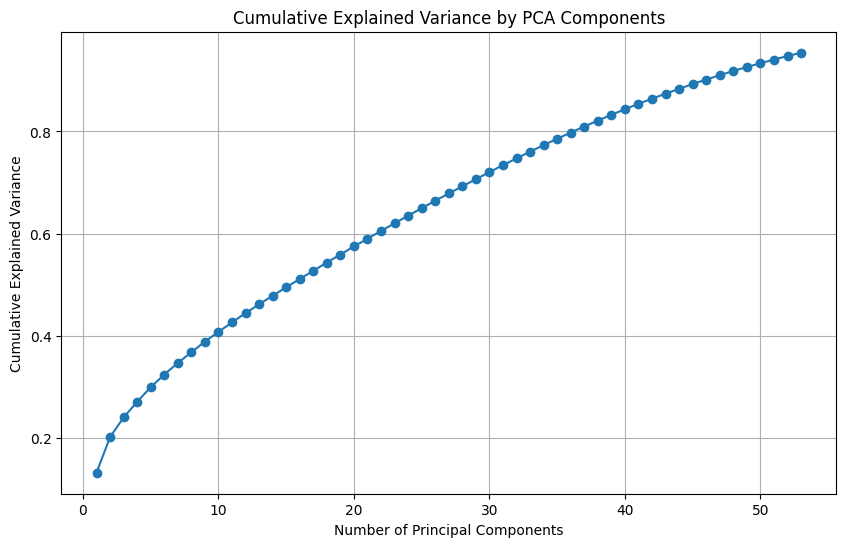

PCA-transformed data saved to 'pca_transformed_data.csv'.


In [15]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Handle Missing Values
# Numerical columns - Fill with mean/median
numerical_cols = df1.select_dtypes(include=['float64', 'int64']).columns
imputer_numerical = SimpleImputer(strategy='mean')  # Change to 'median' if skewness is high
df1[numerical_cols] = imputer_numerical.fit_transform(df1[numerical_cols])

# Check for categorical columns
categorical_cols = df1.select_dtypes(include=['object']).columns

if len(categorical_cols) > 0:  # If there are categorical columns
    # Categorical columns - Fill with mode
    imputer_categorical = SimpleImputer(strategy='most_frequent')
    df1[categorical_cols] = imputer_categorical.fit_transform(df1[categorical_cols])
    print(f"\nFilled missing values for categorical columns: {categorical_cols}")
else:
    print("\nNo categorical columns found. Skipping categorical imputation.")

# Step 2: Verify no missing values remain
print("\nMissing values handled. No missing values remain:")
print(df1.isnull().sum().sum())  # Should output 0

# Step 3: Scale the Data
scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(df1[numerical_cols])

# Step 4: Perform PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
principal_components = pca.fit_transform(numerical_data_scaled)

# Create a DataFrame for the principal components
pca_columns = [f'PC{i+1}' for i in range(principal_components.shape[1])]
df_pca = pd.DataFrame(principal_components, columns=pca_columns)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("\nExplained Variance Ratio of Each Principal Component:")
print(explained_variance_ratio)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Step 5: Save the PCA-transformed data
df_pca.to_csv('pca_transformed_data.csv', index=False)
print(f"PCA-transformed data saved to 'pca_transformed_data.csv'.")


# Select PCs for 80% Variance


Number of components needed to explain 80% variance: 37


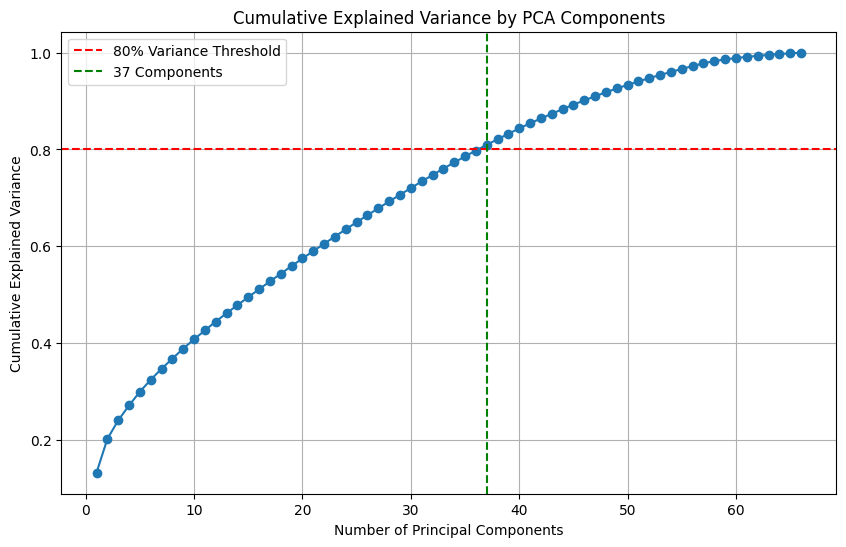

PCA-transformed data (80% variance) saved to 'pca_80_transformed_data.csv'.


In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Re-compute PCA with all components
pca_full = PCA()
pca_full.fit(numerical_data_scaled)

# Calculate cumulative explained variance
cumulative_variance = pca_full.explained_variance_ratio_.cumsum()

# Determine the number of components needed for 80% variance
n_components_80 = (cumulative_variance >= 0.80).argmax() + 1
print(f"\nNumber of components needed to explain 80% variance: {n_components_80}")

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.80, color='r', linestyle='--', label='80% Variance Threshold')
plt.axvline(x=n_components_80, color='g', linestyle='--', label=f'{n_components_80} Components')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid()
plt.show()

# Apply PCA with selected components
pca_80 = PCA(n_components=n_components_80)
principal_components_80 = pca_80.fit_transform(numerical_data_scaled)

# Create a DataFrame for the selected principal components
pca_columns_80 = [f'PC{i+1}' for i in range(principal_components_80.shape[1])]
df_pca_80 = pd.DataFrame(principal_components_80, columns=pca_columns_80)

# Save the PCA-transformed data
df_pca_80.to_csv('pca_80_transformed_data.csv', index=False)
print(f"PCA-transformed data (80% variance) saved to 'pca_80_transformed_data.csv'.")


 # Linear Regression Using PCA Data

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Step 1: Load PCA-transformed data
# Ensure 'pca_80_transformed_data.csv' is in the same directory
df_pca_80 = pd.read_csv('pca_80_transformed_data.csv')

# Target variable (WEIGHTLBTC_A)
target = 'WEIGHTLBTC_A'

# Assuming the original target variable is still available in the original dataset
y = df1[target]  # Extract the target variable
X = df_pca_80  # PCA-transformed features

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Build and train Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = regressor.predict(X_test)

# Step 5: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Step 6: Save predictions for analysis
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predictions.to_csv('regression_predictions.csv', index=False)
print("Predictions saved to 'regression_predictions.csv'.")



Model Evaluation Metrics:
Mean Absolute Error (MAE): 7.97
Mean Squared Error (MSE): 174.46
Root Mean Squared Error (RMSE): 13.21
R² Score: 0.89
Predictions saved to 'regression_predictions.csv'.



Model Accuracy:

The model performs well overall, explaining 89% of the variance (high R²).
Prediction errors (as measured by MAE and RMSE) are moderate but acceptable depending on the use case.

Room for Improvement:
While the model performs well, errors of around 7.97–13.21 units might be significant depending on the domain (e.g., healthcare, where precise weight predictions may be critical).

Key Insights:
If the acceptable error margin is around 10–15 units, this model is good enough.
If higher precision is required, consider advanced models or additional feature engineering.

# Random Forest Regressor

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Step 1: Train Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Step 2: Make predictions
y_pred_rf = rf_regressor.predict(X_test)

# Step 3: Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"R² Score: {r2_rf:.2f}")

# Step 4: Save predictions for analysis
rf_predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
rf_predictions.to_csv('rf_regression_predictions.csv', index=False)
print("Random Forest predictions saved to 'rf_regression_predictions.csv'.")



Random Forest Model Evaluation Metrics:
Mean Absolute Error (MAE): 11.13
Mean Squared Error (MSE): 232.17
Root Mean Squared Error (RMSE): 15.24
R² Score: 0.85
Random Forest predictions saved to 'rf_regression_predictions.csv'.


# Random forest on original dataset

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Step 1: Prepare features and target
X_original = df1.drop(columns=['WEIGHTLBTC_A'])  # Drop the target column from the features
y_original = df1['WEIGHTLBTC_A']  # Target variable

# Step 2: Split data into training and testing sets
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(
    X_original, y_original, test_size=0.2, random_state=42
)

# Step 3: Train Random Forest Regressor
rf_regressor_original = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor_original.fit(X_train_original, y_train_original)

# Step 4: Make predictions
y_pred_rf_original = rf_regressor_original.predict(X_test_original)

# Step 5: Evaluate the model
mae_rf_original = mean_absolute_error(y_test_original, y_pred_rf_original)
mse_rf_original = mean_squared_error(y_test_original, y_pred_rf_original)
rmse_rf_original = np.sqrt(mse_rf_original)
r2_rf_original = r2_score(y_test_original, y_pred_rf_original)

print("\nRandom Forest Model Evaluation Metrics (Original Dataset):")
print(f"Mean Absolute Error (MAE): {mae_rf_original:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf_original:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf_original:.2f}")
print(f"R² Score: {r2_rf_original:.2f}")

# Step 6: Save predictions for analysis
rf_predictions_original = pd.DataFrame({'Actual': y_test_original, 'Predicted': y_pred_rf_original})
rf_predictions_original.to_csv('rf_original_regression_predictions.csv', index=False)
print("Random Forest predictions (original dataset) saved to 'rf_original_regression_predictions.csv'.")



Random Forest Model Evaluation Metrics (Original Dataset):
Mean Absolute Error (MAE): 11.22
Mean Squared Error (MSE): 224.59
Root Mean Squared Error (RMSE): 14.99
R² Score: 0.86
Random Forest predictions (original dataset) saved to 'rf_original_regression_predictions.csv'.


# Linear Regression on Original Dataset

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Step 1: Prepare features and target
X_original = df1.drop(columns=['WEIGHTLBTC_A'])  # Drop the target column from the features
y_original = df1['WEIGHTLBTC_A']  # Target variable

# Step 2: Split data into training and testing sets
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(
    X_original, y_original, test_size=0.2, random_state=42
)

# Step 3: Train Linear Regression Model
linear_regressor_original = LinearRegression()
linear_regressor_original.fit(X_train_original, y_train_original)

# Step 4: Make predictions
y_pred_lr_original = linear_regressor_original.predict(X_test_original)

# Step 5: Evaluate the model
mae_lr_original = mean_absolute_error(y_test_original, y_pred_lr_original)
mse_lr_original = mean_squared_error(y_test_original, y_pred_lr_original)
rmse_lr_original = np.sqrt(mse_lr_original)
r2_lr_original = r2_score(y_test_original, y_pred_lr_original)

print("\nLinear Regression Model Evaluation Metrics (Original Dataset):")
print(f"Mean Absolute Error (MAE): {mae_lr_original:.2f}")
print(f"Mean Squared Error (MSE): {mse_lr_original:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr_original:.2f}")
print(f"R² Score: {r2_lr_original:.2f}")

# Step 6: Save predictions for analysis
lr_predictions_original = pd.DataFrame({'Actual': y_test_original, 'Predicted': y_pred_lr_original})
lr_predictions_original.to_csv('lr_original_regression_predictions.csv', index=False)
print("Linear Regression predictions (original dataset) saved to 'lr_original_regression_predictions.csv'.")



Linear Regression Model Evaluation Metrics (Original Dataset):
Mean Absolute Error (MAE): 13.42
Mean Squared Error (MSE): 501.88
Root Mean Squared Error (RMSE): 22.40
R² Score: 0.68
Linear Regression predictions (original dataset) saved to 'lr_original_regression_predictions.csv'.


# XGBoost
We'll first train and evaluate an XGBoost Regressor on the PCA data.

In [24]:
pip install xgboost

  Using cached xgboost-2.1.3-py3-none-macosx_12_0_arm64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.3-py3-none-macosx_12_0_arm64.whl (1.9 MB)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [26]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Step 1: Load PCA-transformed data and target
df_pca_80 = pd.read_csv('pca_80_transformed_data.csv')  # Load PCA-transformed data
y_pca = df1['WEIGHTLBTC_A']  # Target variable
X_pca = df_pca_80  # PCA features

# Step 2: Split data into training and testing sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y_pca, test_size=0.2, random_state=42
)

# Step 3: Train Ridge Regression
ridge_regressor = Ridge(alpha=1.0)  # Regularization strength (alpha)
ridge_regressor.fit(X_train_pca, y_train_pca)

# Predict using Ridge Regression
y_pred_ridge = ridge_regressor.predict(X_test_pca)

# Evaluate Ridge Regression
mae_ridge = mean_absolute_error(y_test_pca, y_pred_ridge)
mse_ridge = mean_squared_error(y_test_pca, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test_pca, y_pred_ridge)

print("\nRidge Regression Model Evaluation Metrics (PCA Data):")
print(f"Mean Absolute Error (MAE): {mae_ridge:.2f}")
print(f"Mean Squared Error (MSE): {mse_ridge:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge:.2f}")
print(f"R² Score: {r2_ridge:.2f}")

# Step 4: Train Lasso Regression
lasso_regressor = Lasso(alpha=0.1)  # Regularization strength (alpha)
lasso_regressor.fit(X_train_pca, y_train_pca)

# Predict using Lasso Regression
y_pred_lasso = lasso_regressor.predict(X_test_pca)

# Evaluate Lasso Regression
mae_lasso = mean_absolute_error(y_test_pca, y_pred_lasso)
mse_lasso = mean_squared_error(y_test_pca, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test_pca, y_pred_lasso)

print("\nLasso Regression Model Evaluation Metrics (PCA Data):")
print(f"Mean Absolute Error (MAE): {mae_lasso:.2f}")
print(f"Mean Squared Error (MSE): {mse_lasso:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso:.2f}")
print(f"R² Score: {r2_lasso:.2f}")

# Save predictions for analysis
ridge_predictions = pd.DataFrame({'Actual': y_test_pca, 'Predicted': y_pred_ridge})
ridge_predictions.to_csv('ridge_pca_regression_predictions.csv', index=False)
print("Ridge Regression predictions (PCA data) saved to 'ridge_pca_regression_predictions.csv'.")

lasso_predictions = pd.DataFrame({'Actual': y_test_pca, 'Predicted': y_pred_lasso})
lasso_predictions.to_csv('lasso_pca_regression_predictions.csv', index=False)
print("Lasso Regression predictions (PCA data) saved to 'lasso_pca_regression_predictions.csv'.")



Ridge Regression Model Evaluation Metrics (PCA Data):
Mean Absolute Error (MAE): 7.97
Mean Squared Error (MSE): 174.46
Root Mean Squared Error (RMSE): 13.21
R² Score: 0.89

Lasso Regression Model Evaluation Metrics (PCA Data):
Mean Absolute Error (MAE): 8.00
Mean Squared Error (MSE): 174.48
Root Mean Squared Error (RMSE): 13.21
R² Score: 0.89
Ridge Regression predictions (PCA data) saved to 'ridge_pca_regression_predictions.csv'.
Lasso Regression predictions (PCA data) saved to 'lasso_pca_regression_predictions.csv'.


# KNN Regression on PCA-Transformed Data

In [27]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Load PCA-transformed data
df_pca_80 = pd.read_csv('pca_80_transformed_data.csv')  # PCA-transformed data
y_pca = df1['WEIGHTLBTC_A']  # Target variable
X_pca = df_pca_80  # PCA features

# Split data into training and testing sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y_pca, test_size=0.2, random_state=42
)

# Train KNN Regressor
knn_regressor_pca = KNeighborsRegressor(n_neighbors=5)  # Using 5 neighbors
knn_regressor_pca.fit(X_train_pca, y_train_pca)

# Make predictions
y_pred_pca = knn_regressor_pca.predict(X_test_pca)

# Evaluate the model
mae_pca = mean_absolute_error(y_test_pca, y_pred_pca)
mse_pca = mean_squared_error(y_test_pca, y_pred_pca)
rmse_pca = np.sqrt(mse_pca)
r2_pca = r2_score(y_test_pca, y_pred_pca)

print("\nKNN Regression Model Evaluation Metrics (PCA Data):")
print(f"Mean Absolute Error (MAE): {mae_pca:.2f}")
print(f"Mean Squared Error (MSE): {mse_pca:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_pca:.2f}")
print(f"R² Score: {r2_pca:.2f}")

# Save predictions
knn_pca_predictions = pd.DataFrame({'Actual': y_test_pca, 'Predicted': y_pred_pca})
knn_pca_predictions.to_csv('knn_pca_regression_predictions.csv', index=False)
print("KNN predictions (PCA data) saved to 'knn_pca_regression_predictions.csv'.")



KNN Regression Model Evaluation Metrics (PCA Data):
Mean Absolute Error (MAE): 15.34
Mean Squared Error (MSE): 417.23
Root Mean Squared Error (RMSE): 20.43
R² Score: 0.73
KNN predictions (PCA data) saved to 'knn_pca_regression_predictions.csv'.


# KNN Regression on original Data

In [28]:
# Load original dataset
X_original = df1.drop(columns=['WEIGHTLBTC_A'])  # Original features
y_original = df1['WEIGHTLBTC_A']  # Target variable

# Split data into training and testing sets
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(
    X_original, y_original, test_size=0.2, random_state=42
)

# Train KNN Regressor
knn_regressor_original = KNeighborsRegressor(n_neighbors=5)  # Using 5 neighbors
knn_regressor_original.fit(X_train_original, y_train_original)

# Make predictions
y_pred_original = knn_regressor_original.predict(X_test_original)

# Evaluate the model
mae_original = mean_absolute_error(y_test_original, y_pred_original)
mse_original = mean_squared_error(y_test_original, y_pred_original)
rmse_original = np.sqrt(mse_original)
r2_original = r2_score(y_test_original, y_pred_original)

print("\nKNN Regression Model Evaluation Metrics (Original Data):")
print(f"Mean Absolute Error (MAE): {mae_original:.2f}")
print(f"Mean Squared Error (MSE): {mse_original:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_original:.2f}")
print(f"R² Score: {r2_original:.2f}")

# Save predictions
knn_original_predictions = pd.DataFrame({'Actual': y_test_original, 'Predicted': y_pred_original})
knn_original_predictions.to_csv('knn_original_regression_predictions.csv', index=False)
print("KNN predictions (original data) saved to 'knn_original_regression_predictions.csv'.")



KNN Regression Model Evaluation Metrics (Original Data):
Mean Absolute Error (MAE): 28.05
Mean Squared Error (MSE): 1273.48
Root Mean Squared Error (RMSE): 35.69
R² Score: 0.18
KNN predictions (original data) saved to 'knn_original_regression_predictions.csv'.


# Ridge Regression Hyperparameter Tuning

In [29]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Step 1: Load PCA-transformed data and target
df_pca_80 = pd.read_csv('pca_80_transformed_data.csv')  # PCA-transformed data
y_pca = df1['WEIGHTLBTC_A']  # Target variable
X_pca = df_pca_80  # PCA features

# Step 2: Split data into training and testing sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y_pca, test_size=0.2, random_state=42
)

# Step 3: Define parameter grid for alpha
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 500, 1000]}

# Step 4: Perform Grid Search
ridge = Ridge()
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_pca, y_train_pca)

# Step 5: Get best parameters and refit model
best_alpha = grid_search.best_params_['alpha']
print(f"Best Alpha: {best_alpha}")

# Train Ridge Regression with the best alpha
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train_pca, y_train_pca)

# Step 6: Make predictions and evaluate the tuned model
y_pred_ridge_best = ridge_best.predict(X_test_pca)

mae_ridge_best = mean_absolute_error(y_test_pca, y_pred_ridge_best)
mse_ridge_best = mean_squared_error(y_test_pca, y_pred_ridge_best)
rmse_ridge_best = np.sqrt(mse_ridge_best)
r2_ridge_best = r2_score(y_test_pca, y_pred_ridge_best)

print("\nTuned Ridge Regression Model Evaluation Metrics (PCA Data):")
print(f"Mean Absolute Error (MAE): {mae_ridge_best:.2f}")
print(f"Mean Squared Error (MSE): {mse_ridge_best:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge_best:.2f}")
print(f"R² Score: {r2_ridge_best:.2f}")

# Save predictions for analysis
ridge_tuned_predictions = pd.DataFrame({'Actual': y_test_pca, 'Predicted': y_pred_ridge_best})
ridge_tuned_predictions.to_csv('ridge_tuned_pca_regression_predictions.csv', index=False)
print("Tuned Ridge Regression predictions saved to 'ridge_tuned_pca_regression_predictions.csv'.")


Best Alpha: 10

Tuned Ridge Regression Model Evaluation Metrics (PCA Data):
Mean Absolute Error (MAE): 7.97
Mean Squared Error (MSE): 174.45
Root Mean Squared Error (RMSE): 13.21
R² Score: 0.89
Tuned Ridge Regression predictions saved to 'ridge_tuned_pca_regression_predictions.csv'.


# 10-Fold Cross-Validation on Linear Regression (PCA Data)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Step 1: Load PCA-transformed data and target
df_pca_80 = pd.read_csv('pca_80_transformed_data.csv')  # PCA-transformed data
y_pca = df1['WEIGHTLBTC_A']  # Target variable
X_pca = df_pca_80  # PCA features

# Step 2: Initialize Linear Regression model
linear_regressor = LinearRegression()

# Step 3: Define custom scoring metrics
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Step 4: Perform 10-Fold Cross-Validation
print("\nPerforming 10-Fold Cross-Validation...")
cv_mae = cross_val_score(linear_regressor, X_pca, y_pca, scoring=mae_scorer, cv=10)
cv_mse = cross_val_score(linear_regressor, X_pca, y_pca, scoring=mse_scorer, cv=10)
cv_r2 = cross_val_score(linear_regressor, X_pca, y_pca, scoring=r2_scorer, cv=10)

# Convert negative MAE and MSE back to positive
cv_mae = -cv_mae
cv_mse = -cv_mse

# Step 5: Output Cross-Validation Results
print("\nLinear Regression 10-Fold Cross-Validation Results (PCA Data):")
print(f"Mean Absolute Error (MAE): {cv_mae.mean():.2f} ± {cv_mae.std():.2f}")
print(f"Mean Squared Error (MSE): {cv_mse.mean():.2f} ± {cv_mse.std():.2f}")
print(f"R² Score: {cv_r2.mean():.2f} ± {cv_r2.std():.2f}")



Performing 10-Fold Cross-Validation...

Linear Regression 10-Fold Cross-Validation Results (PCA Data):
Mean Absolute Error (MAE): 7.92 ± 0.17
Mean Squared Error (MSE): 158.23 ± 25.62
R² Score: 0.90 ± 0.02


Insights

Performance:

The MAE of 7.92 indicates that the model's predictions are, on average, off by ~7.92 units, which is consistent with the earlier results.

The MSE and RMSE (calculated as √MSE) are relatively low, suggesting the model performs well across different splits.

The R² Score of 0.90 ± 0.02 confirms that the model explains ~90% of the variance in the data, with minimal fluctuation across folds.

Consistency:

The small standard deviations (±0.17 for MAE, ±25.62 for MSE, and ±0.02 for R²) suggest that the model generalizes well and performs consistently across all 10 folds.

# 10-Fold Cross-Validation on Ridge Regression (PCA Data)

In [31]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Step 1: Load PCA-transformed data and target
df_pca_80 = pd.read_csv('pca_80_transformed_data.csv')  # PCA-transformed data
y_pca = df1['WEIGHTLBTC_A']  # Target variable
X_pca = df_pca_80  # PCA features

# Step 2: Initialize Ridge Regression model with best alpha (from earlier tuning)
ridge_regressor = Ridge(alpha=10)

# Step 3: Define custom scoring metrics
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Step 4: Perform 10-Fold Cross-Validation
print("\nPerforming 10-Fold Cross-Validation for Ridge Regression...")
cv_mae = cross_val_score(ridge_regressor, X_pca, y_pca, scoring=mae_scorer, cv=10)
cv_mse = cross_val_score(ridge_regressor, X_pca, y_pca, scoring=mse_scorer, cv=10)
cv_r2 = cross_val_score(ridge_regressor, X_pca, y_pca, scoring=r2_scorer, cv=10)

# Convert negative MAE and MSE back to positive
cv_mae = -cv_mae
cv_mse = -cv_mse

# Step 5: Output Cross-Validation Results
print("\nRidge Regression 10-Fold Cross-Validation Results (PCA Data):")
print(f"Mean Absolute Error (MAE): {cv_mae.mean():.2f} ± {cv_mae.std():.2f}")
print(f"Mean Squared Error (MSE): {cv_mse.mean():.2f} ± {cv_mse.std():.2f}")
print(f"R² Score: {cv_r2.mean():.2f} ± {cv_r2.std():.2f}")



Performing 10-Fold Cross-Validation for Ridge Regression...

Ridge Regression 10-Fold Cross-Validation Results (PCA Data):
Mean Absolute Error (MAE): 7.92 ± 0.17
Mean Squared Error (MSE): 158.23 ± 25.60
R² Score: 0.90 ± 0.02


# Final Model on Linear Regression PCA DATA

In [32]:
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Step 1: Load PCA-transformed data and target
df_pca_80 = pd.read_csv('pca_80_transformed_data.csv')  # PCA-transformed data
y_pca = df1['WEIGHTLBTC_A']  # Target variable
X_pca = df_pca_80  # PCA features

# Step 2: Train-Test Split
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y_pca, test_size=0.2, random_state=42
)

# Step 3: Train the Linear Regression Model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_pca, y_train_pca)

# Step 4: Save Model Information
student_names = ['Rushikesh Pokale', 'Vidyen Wadgave', 'Rajeshwari Tikhale', 'Valeria Castillo']
student_ids = ['102313', '000001', '000002', '000003']
output_file = 'Pokale_Wadgave_Tikhale_Castillo_model_info.pkl'

def save_model_info(student_names, student_ids, model, output_file):
    """
    Save model information to a file.

    Args:
        student_names (list): List of student names.
        student_ids (list): List of student IDs.
        model: Trained model.
        output_file (str): Output file name.
    """
    data = {
        'student_names': student_names,
        'student_ids': student_ids,
        'model': model
    }
    with open(output_file, 'wb') as f:
        pickle.dump(data, f)

# Save the model and student information
save_model_info(student_names, student_ids, linear_regressor, output_file)
print(f"Model information saved to '{output_file}'.")

# Step 5: Verify Model Saving (Optional)
with open(output_file, 'rb') as f:
    saved_data = pickle.load(f)
    print("Saved Data:")
    print(f"Student Names: {saved_data['student_names']}")
    print(f"Student IDs: {saved_data['student_ids']}")
    print(f"Model Type: {type(saved_data['model'])}")


Model information saved to 'Pokale_Wadgave_Tikhale_Castillo_model_info.pkl'.
Saved Data:
Student Names: ['Rushikesh Pokale', 'Vidyen Wadgave', 'Rajeshwari Tikhale', 'Valeria Castillo']
Student IDs: ['102313', '000001', '000002', '000003']
Model Type: <class 'sklearn.linear_model._base.LinearRegression'>
